<a href="https://colab.research.google.com/github/rornellas/colab_preco_seguro_rl/blob/main/desafio_fiap_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explorando os dados e realizando um treinamento SIMPLES

In [3]:
#analisando dados do dataset
!pip install -q -U tpot
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/IA para devs - fiap/machine learning/aula 2 - regressão linear e métricas de validação/insurance.csv')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
print(df.head(1), "\n")
print(df.shape, "\n")
print(df.info(), "\n")
print(df.describe(), "\n")
print(df.isnull().sum(), "\n")

# Tentativa...

Aqui tentei aplicar o one-ho na coluna region... mas não reve relevancia nos resultados

In [ ]:
#verificando variacao de valores na coluna region

print(df["region"].value_counts())

#from sklearn.preprocessing import OneHotEncoder

# Instanciando o encoder
#encoder = OneHotEncoder(sparse=False)

# Ajustando o encoder na coluna 'region' e transformando os dados
#encoded_regions = encoder.fit_transform(df[['region']])

# Criando um DataFrame com as novas colunas
#encoded_df = pd.DataFrame(encoded_regions, columns=encoder.get_feature_names_out(['region']))

# Concatenando com o DataFrame original
#df = pd.concat([df, encoded_df], axis=1)

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
print(df.head())

   age     sex     bmi  children smoker     region      charges  \
0   19  female  27.900         0    yes  southwest  16884.92400   
1   18    male  33.770         1     no  southeast   1725.55230   
2   28    male  33.000         3     no  southeast   4449.46200   
3   33    male  22.705         0     no  northwest  21984.47061   
4   32    male  28.880         0     no  northwest   3866.85520   

   region_northeast  region_northwest  region_southeast  region_southwest  
0               0.0               0.0               0.0               1.0  
1               0.0               0.0               1.0               0.0  
2               0.0               0.0               1.0               0.0  
3               0.0               1.0               0.0               0.0  
4               0.0               1.0               0.0               0.0  


# Tentativa...

Tentei também agrupar algumas informações... mas o resultado disso foi ruim pois a precisao do modelo baixou

In [ ]:
df["age_group"] = pd.cut(df["age"], bins=[-1, 20, 30, 40, 50, 60, 1000], labels=["Até 20", "21 a 30", "31 a 40", "41 a 50", "51 a 60", "60+"])
set(df['age_group'])

{'21 a 30', '31 a 40', '41 a 50', '51 a 60', '60+', 'Até 20'}

In [ ]:
df["children_group"] = pd.cut(df["children"], bins=[-1, 3, 1000], labels=["0 a 3","4+"])
set(df['children_group'])

{'0 a 3', '4+'}

In [ ]:
%matplotlib inline

plt.scatter(df['age'], df['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Scatter Plot of Age vs Charges')
plt.show()

plt.scatter(df['children'], df['charges'])
plt.xlabel('Children')
plt.ylabel('Charges')
plt.title('Scatter Plot of Age vs Charges')
plt.show()

plt.scatter(df['children_group'], df['charges'])
plt.xlabel('children_group')
plt.ylabel('Charges')
plt.title('Scatter Plot of Age vs Charges')
plt.show()

# Aplicando Label Encoding

In [ ]:
#encodando categorias - o region vai ser encodado também, pois temos apenas 4 tipos

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_exec1 = df.copy()

#df_exec1['age_group'] = le.fit_transform(df_exec1['age_group'])
#df_exec1['children_group'] = le.fit_transform(df_exec1['children_group'])
df_exec1['sex'] = le.fit_transform(df_exec1['sex'])
df_exec1['smoker'] = le.fit_transform(df_exec1['smoker'])
df_exec1['region'] = le.fit_transform(df_exec1['region'])

#df_exec1 = df_exec1.drop('age', axis=1)
#df_exec1 = df_exec1.drop('children', axis=1)


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'region'}>],
       [<Axes: title={'center': 'charges'}>, <Axes: >, <Axes: >]],
      dtype=object)

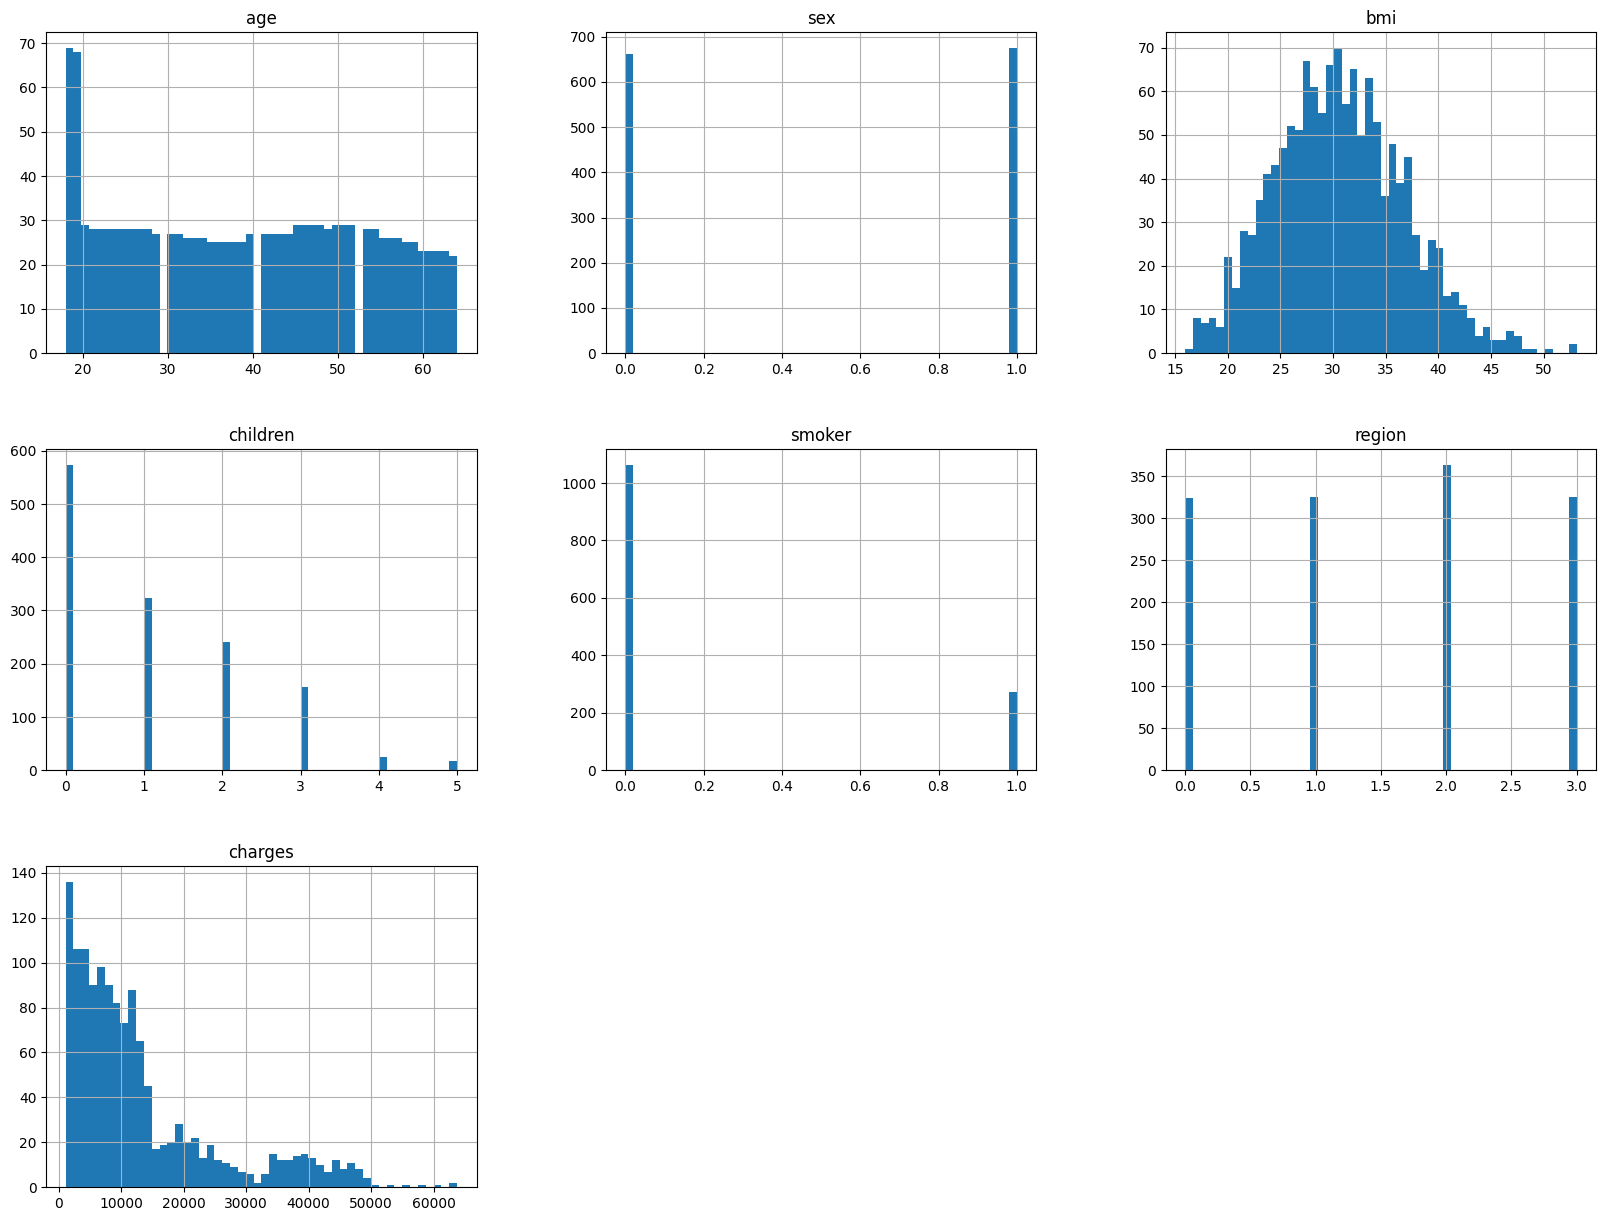

In [ ]:
#verificando a distribuicao dos dados

%matplotlib inline
import matplotlib.pyplot as plt
df_exec1.hist(bins=50, figsize=(20,15))

In [ ]:

plt.scatter(df['bmi'], df['charges'])
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Scatter Plot of Region vs Charges')
plt.show()


In [ ]:
# verificando possiveis outliers
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_exec1.drop('charges', axis=1).select_dtypes(include=['int','float']))
plt.title('Box Plot of Scaled Numeric Columns')
plt.show()


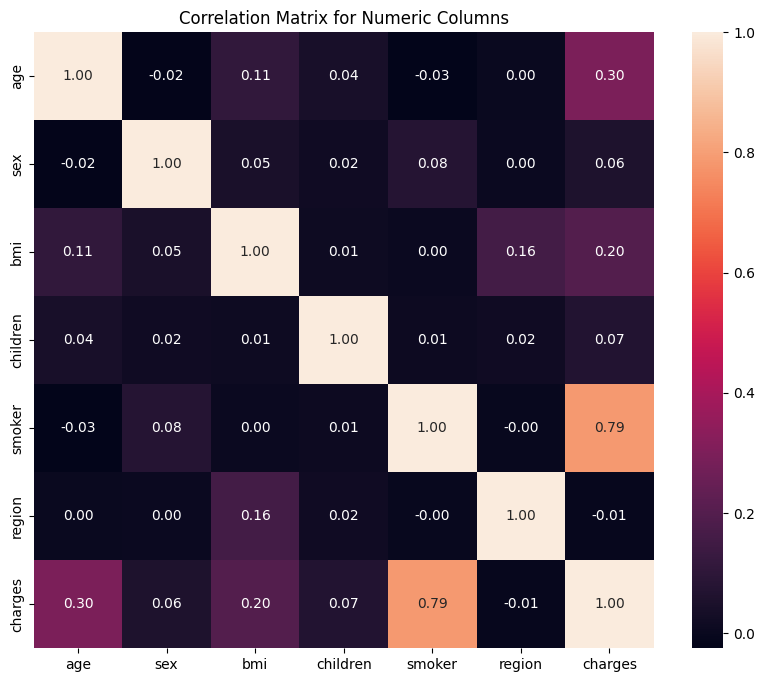

In [ ]:
#printando grafico de correlacao

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df_exec1.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix for Numeric Columns')
plt.show()


# Treino 1

Treinando o modelo sem feature-engineering, obtive 76% no R2

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_X=df_exec1.drop('charges', axis=1)
df_y=df_exec1['charges']

print(df_X.shape, '\n')
print(df_y.shape, '\n')

df_train, df_test, df_y_train, df_y_test = train_test_split(df_X, df_y, test_size = 0.2, random_state = 7)

stdScaler = StandardScaler()

df_train_scaled = stdScaler.fit_transform(df_train)

df_test_scaled = stdScaler.transform(df_test)

print(len(df_train), "treinamento +", len(df_test), "teste")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Treinando o modelo de Regressão Linear
modelo = LinearRegression()
modelo.fit(df_train_scaled, df_y_train)

# Fazendo previsões nos dados de teste
y_pred = modelo.predict(df_test_scaled)

# Avaliando o desempenho do modelo
mse = mean_squared_error(df_y_test, y_pred)
mae = mean_absolute_error(df_y_test, y_pred)
r2 = r2_score(df_y_test, y_pred)

# Imprimindo as métricas de avaliação
print('MSE:', mse)
print('MAE:', mae)
print('R2:', r2)


1070 treinamento + 268 teste


# Treino 2

Treinando o modelo agora com o PolynomialFeatures, e obtive quase 84% no R2

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures,OneHotEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline

df_X=df_exec1.drop('charges', axis=1)
df_y=df_exec1['charges']

print(df_X.shape, '\n')
print(df_y.shape, '\n')

df_train, df_test, df_y_train, df_y_test = train_test_split(df_X, df_y, test_size = 0.2, random_state = 7)

column_transformer = ColumnTransformer(
    transformers=[
        #('cat', OneHotEncoder(), ['region']),
        MinMaxScaler(),
    ],
    remainder='passthrough'  # Mantém as outras colunas sem alterações
)

pipeline = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), PCA(n_components=25), LinearRegression())

# Aplicando validação cruzada
scores = cross_val_score(pipeline, df_train, df_y_train, cv=5)

# Treinando o modelo
pipeline.fit(df_train, df_y_train)

print(pipeline.get_feature_names_out)

y_pred = pipeline.predict(df_test)

mse = mean_squared_error(df_y_test, y_pred)
mae = mean_absolute_error(df_y_test, y_pred)
r2 = r2_score(df_y_test, y_pred)

# Avaliando o modelo
print("Score de validação cruzada:", scores)
print("Score médio de validação cruzada:", scores.mean())
print('MSE:', mse)
print('MAE:', mae)
print('R2:', r2)

(1338, 6) 

(1338,) 

<bound method Pipeline.get_feature_names_out of Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])>
Score de validação cruzada: [0.83617228 0.86383791 0.841488   0.79995857 0.8578069 ]
Score médio de validação cruzada: 0.8398527299355267
MSE: 25945706.001200557
MAE: 3028.311043134329
R2: 0.8378228965301677


# Treino 2 removendo features de baixa correlação

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures,OneHotEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline

df_X=df_exec1.drop('charges', axis=1)
df_X = df_X[['bmi','age','smoker','children']]
df_y=df_exec1['charges']

print(df_X.shape, '\n')
print(df_y.shape, '\n')

df_train, df_test, df_y_train, df_y_test = train_test_split(df_X, df_y, test_size = 0.2, random_state = 7)

column_transformer = ColumnTransformer(
    transformers=[
        #('cat', OneHotEncoder(), ['region']),
        MinMaxScaler(),
    ],
    remainder='passthrough'  # Mantém as outras colunas sem alterações
)

pipeline = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression())

# Aplicando validação cruzada
scores = cross_val_score(pipeline, df_train, df_y_train, cv=5)

# Treinando o modelo
pipeline.fit(df_train, df_y_train)

print(pipeline.get_feature_names_out)

y_pred = pipeline.predict(df_test)

mse = mean_squared_error(df_y_test, y_pred)
mae = mean_absolute_error(df_y_test, y_pred)
r2 = r2_score(df_y_test, y_pred)

# Avaliando o modelo
print("Score de validação cruzada:", scores)
print("Score médio de validação cruzada:", scores.mean())
print('MSE:', mse)
print('MAE:', mae)
print('R2:', r2)

(1338, 4) 

(1338,) 

<bound method Pipeline.get_feature_names_out of Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])>
Score de validação cruzada: [0.84171788 0.86257817 0.84173678 0.79906152 0.85400558]
Score médio de validação cruzada: 0.8398199877609518
MSE: 25883730.133292
MAE: 3002.9583386567165
R2: 0.8382102849767173


# Correlacao das PolinomialFeatures

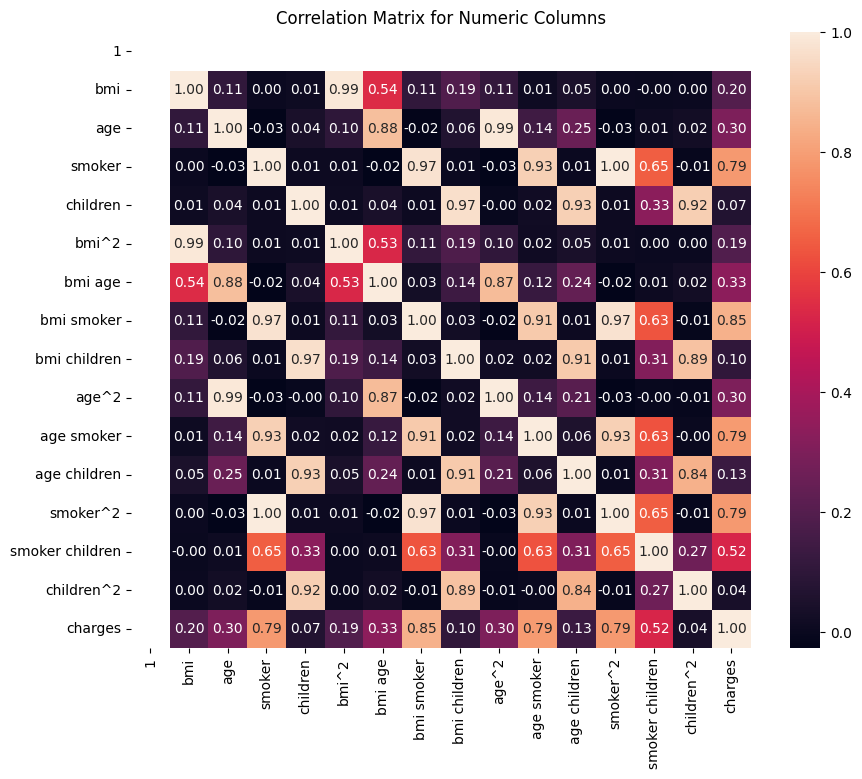

In [ ]:
#printando grafico de correlacao

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures,OneHotEncoder

df_X=df_exec1.drop('charges', axis=1)
df_X = df_X[['bmi','age','smoker','children']]
df_y=df_exec1['charges']

poli = PolynomialFeatures(degree=2);

df_X_poli = poli.fit_transform(df_X)

col_names = poli.get_feature_names_out(input_features=df_X.columns)
df_X_poli = pd.DataFrame(df_X_poli, columns=col_names)

novo_df = pd.concat([df_X_poli, df_y], axis=1)

plt.figure(figsize=(10, 8))
sns.heatmap(novo_df.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix for Numeric Columns')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures,OneHotEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline

df_X=novo_df.drop(['charges','children', 'children^2'], axis=1)
df_y=novo_df['charges']

print(df_X.shape, '\n')
print(df_y.shape, '\n')

df_train, df_test, df_y_train, df_y_test = train_test_split(df_X, df_y, test_size = 0.2, random_state = 7)

column_transformer = ColumnTransformer(
    transformers=[
        #('cat', OneHotEncoder(), ['region']),
        MinMaxScaler(),
    ],
    remainder='passthrough'  # Mantém as outras colunas sem alterações
)

pipeline = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), PCA(n_components=45), LinearRegression())

# Aplicando validação cruzada
scores = cross_val_score(pipeline, df_train, df_y_train, cv=5)

# Treinando o modelo
pipeline.fit(df_train, df_y_train)

print(pipeline.get_feature_names_out)

y_pred = pipeline.predict(df_test)

mse = mean_squared_error(df_y_test, y_pred)
mae = mean_absolute_error(df_y_test, y_pred)
r2 = r2_score(df_y_test, y_pred)

# Avaliando o modelo
print("Score de validação cruzada:", scores)
print("Score médio de validação cruzada:", scores.mean())
print('MSE:', mse)
print('MAE:', mae)
print('R2:', r2)

(1338, 13) 

(1338,) 

<bound method Pipeline.get_feature_names_out of Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('pca', PCA(n_components=45)),
                ('linearregression', LinearRegression())])>
Score de validação cruzada: [0.82679113 0.845877   0.83748142 0.78446072 0.85086488]
Score médio de validação cruzada: 0.8290950306502909
MSE: 24551560.44991302
MAE: 2885.7544456338787
R2: 0.8465371896510681


In [ ]:
import os
print("Número de CPUs disponíveis:", os.cpu_count())

Número de CPUs disponíveis: 12


In [ ]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
import pandas as pd

X=novo_df.drop(['charges','children', 'children^2'], axis=1)
y=novo_df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

# Executar TPOT
tpot = TPOTRegressor(generations=30, population_size=150, verbosity=2, random_state=42, n_jobs=12)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Optimization Progress:   0%|          | 0/4650 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -19154376.31909568

Generation 2 - Current best internal CV score: -19154376.31909568

Generation 3 - Current best internal CV score: -19154376.31909568

Generation 4 - Current best internal CV score: -18885482.554653578

Generation 5 - Current best internal CV score: -18885482.554653578

Generation 6 - Current best internal CV score: -18844511.03758666

Generation 7 - Current best internal CV score: -18844511.03758666

Generation 8 - Current best internal CV score: -18803619.44049888

Generation 9 - Current best internal CV score: -18716021.350593187

Generation 10 - Current best internal CV score: -18716021.350593187

Generation 11 - Current best internal CV score: -18671316.034143474

Generation 12 - Current best internal CV score: -18671316.034143474

Generation 13 - Current best internal CV score: -18570431.279317547

Generation 14 - Current best internal CV score: -18570431.279317547

Generation 15 - Current best internal CV score: 

# Teste com TPOT - Seleção de modelo via programação genética

## Sem Polinomial Features

In [ ]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

X=df_exec1.drop('charges', axis=1)
X=X[['bmi','age','smoker','children']]
y=df_exec1['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

# Executar TPOT
tpot2 = TPOTRegressor(generations=30, population_size=150, verbosity=2, random_state=42, n_jobs=-1)
tpot2.fit(X_train, y_train)
print(tpot2.score(X_test, y_test))

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_pred = tpot2.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('MAE:', mae)
print('R2:', r2)

Optimization Progress:   0%|          | 0/4650 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -20622222.179167222

Generation 2 - Current best internal CV score: -20622222.179167222

Generation 3 - Current best internal CV score: -20571950.86882689

Generation 4 - Current best internal CV score: -20571950.86882689

Generation 5 - Current best internal CV score: -20480917.313728474

Generation 6 - Current best internal CV score: -20227810.22269866

Generation 7 - Current best internal CV score: -20227810.22269866

Generation 8 - Current best internal CV score: -20227810.22269866

Generation 9 - Current best internal CV score: -20227810.22269866

Generation 10 - Current best internal CV score: -20227810.22269866

Generation 11 - Current best internal CV score: -20227810.22269866

Generation 12 - Current best internal CV score: -20227810.22269866

Generation 13 - Current best internal CV score: -20227810.22269866

Generation 14 - Current best internal CV score: -20227810.22269866

Generation 15 - Current best internal CV score: -2022

## Com polinomial features

In [ ]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

X=df_exec1.drop('charges', axis=1)
X=X[['bmi','age','smoker','children']]
y=df_exec1['charges']

poly = PolynomialFeatures(degree=3);

X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, train_size=0.8, test_size=0.2)

# Executar TPOT
tpot = TPOTRegressor(generations=30, population_size=150, verbosity=2, random_state=42, n_jobs=-1)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Optimization Progress:   0%|          | 0/4650 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -22135644.386912722

Generation 2 - Current best internal CV score: -22135644.386912722

Generation 3 - Current best internal CV score: -21997917.076155134

Generation 4 - Current best internal CV score: -21997917.076155134

Generation 5 - Current best internal CV score: -21997917.076155134

Generation 6 - Current best internal CV score: -21935540.02827863

Generation 7 - Current best internal CV score: -21935540.02827863

Generation 8 - Current best internal CV score: -21935540.02827863

Generation 9 - Current best internal CV score: -21935540.02827863

Generation 10 - Current best internal CV score: -21934317.653605353

Generation 11 - Current best internal CV score: -21934317.653605353

Generation 12 - Current best internal CV score: -21883772.824496288

Generation 13 - Current best internal CV score: -21802102.304114796

Generation 14 - Current best internal CV score: -21802102.304114796

Generation 15 - Current best internal CV score

In [ ]:
print(tpot.fitted_pipeline_)

print(tpot.score(X_test, y_test))

Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=RandomForestRegressor(max_features=0.4,
                                                                   min_samples_leaf=19,
                                                                   min_samples_split=3,
                                                                   random_state=42))),
                ('minmaxscaler', MinMaxScaler()),
                ('linearsvr',
                 LinearSVR(dual=False, epsilon=0.01,
                           loss='squared_epsilon_insensitive', random_state=42,
                           tol=1e-05))])
-19314693.627297476


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_pred = tpot.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('MAE:', mae)
print('R2:', r2)

MSE: 24583138.16071456
MAE: 2643.3039444653705
R2: 0.8395160098926643
